In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [9]:
# Carregar o dataset Titanic pré-processado
# Verificar as primeiras linhas para garantir que o dataset está correto

df = pd.read_csv('data/titanic.csv')
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [10]:
# Remover colunas irrelevantes
df = df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'])

In [11]:
# Converter variáveis categóricas (como Sex e Embarked) em numéricas
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Converter sexo (0 = female, 1 = male)
df['Embarked'] = le.fit_transform(df['Embarked'].fillna('S'))  # Preencher valores ausentes de 'Embarked' e converter


In [12]:
# Separar as features (variáveis independentes) e o alvo (variável dependente: sobrevivência)

X = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
# Dividir o dataset em treino (75%) e teste (25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
# Criar e treinar o modelo de árvore de decisão

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

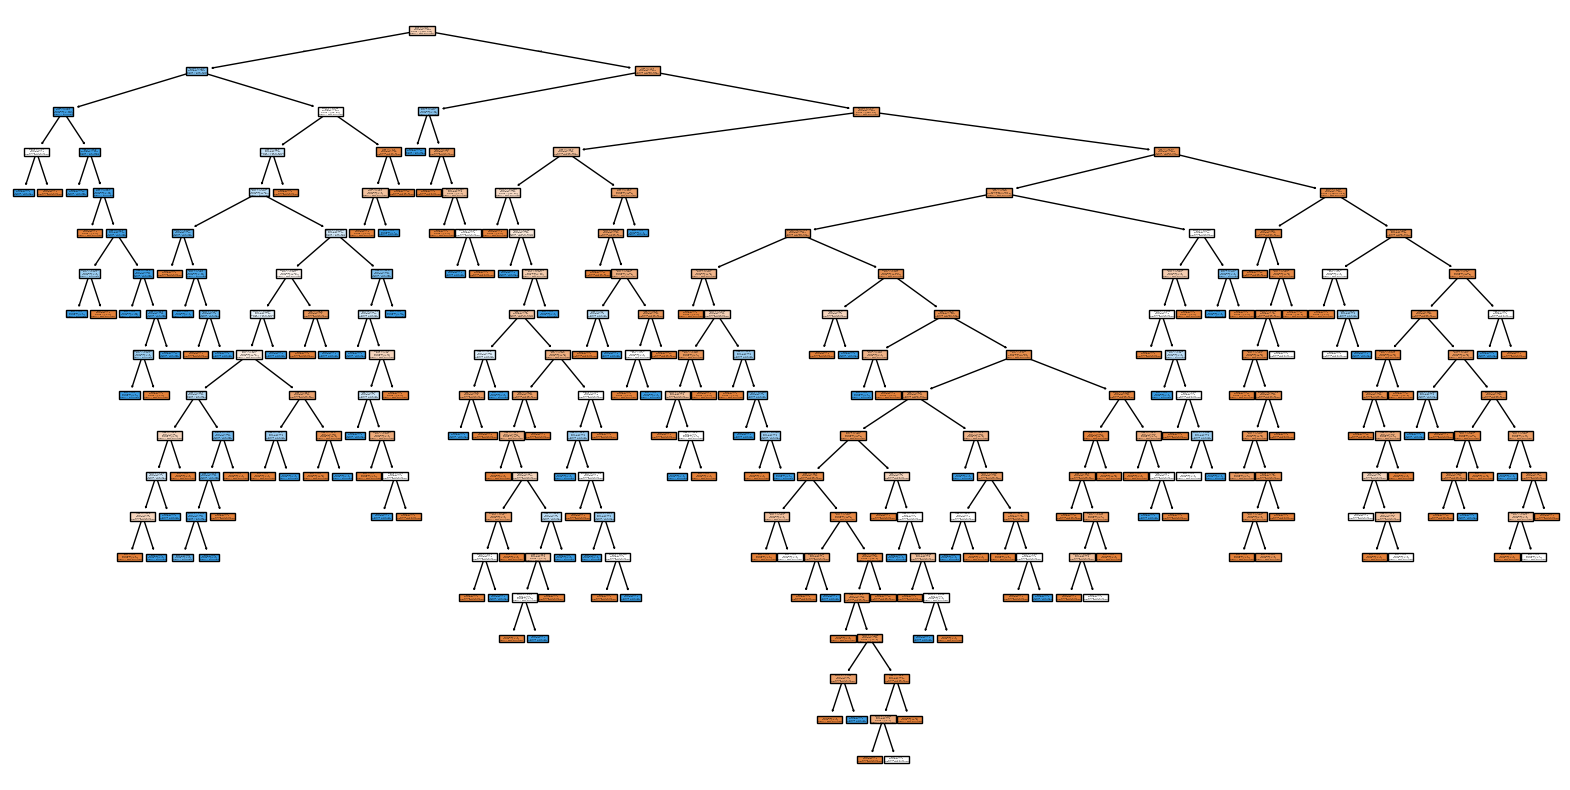

In [15]:
# Visualizar a árvore de decisão

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [16]:
# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

In [17]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy:.2f}")

Accuracy no conjunto de teste: 0.78


Interpretação da Árvore e Resultados:
Interpretação da Árvore:

A árvore de decisão resultante mostra os critérios usados para classificar os passageiros como sobreviventes ou não sobreviventes. Cada nó da árvore representa uma decisão baseada numa variável do dataset, como Sex (sexo), Pclass (classe), ou Age (idade).
Por exemplo, um dos ramos da árvore pode sugerir que mulheres da primeira classe com menos de uma certa idade tinham maior probabilidade de sobreviver, o que é consistente com os relatos históricos sobre o resgate.
Avaliação do Modelo:

A precisão (accuracy) é uma métrica importante, pois indica a porcentagem de previsões corretas feitas pelo modelo no conjunto de teste.
Se a precisão for alta (por exemplo, acima de 0.75), isso indica que o modelo está a fazer previsões razoavelmente boas com base nos dados de treino. No entanto, devemos sempre considerar outras métricas, como a matriz de confusão, recall e precision, especialmente se houver um desbalanceamento nos dados.
Capacidade de Generalização:

O desempenho do modelo no conjunto de teste reflete a sua capacidade de generalizar para novos dados. Se a precisão for semelhante em ambos os conjuntos (treino e teste), significa que o modelo generaliza bem. Caso contrário, ele pode estar sobreajustado (overfitted) aos dados de treino.
Análise de Variáveis Importantes:

A árvore de decisão também nos permite visualizar as variáveis mais importantes para prever a sobrevivência. Variáveis como Sex e Pclass tendem a ser as mais relevantes, conforme esperado.
Conclusão:
A árvore de decisão é uma ferramenta poderosa para prever a sobrevivência no Titanic com base nas características dos passageiros. O modelo pode ser interpretado facilmente e oferece insights sobre os fatores mais importantes para a sobrevivência. Contudo, a sua capacidade de generalização depende da qualidade da divisão dos dados e do ajuste do modelo.